## Is Fandango still inflating rating?


In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest. His artical was published on fivethirtyeight's website: https://fivethirtyeight.com/features/fandango-movies-ratings/

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Understanding the Data

In [1]:
#Import libraries
import pandas as pd
pd.options.display.max_columns = 100  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import data
fandango_score_comparison = pd.read_csv('fandango_score_comparison.csv')
movie_ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')          

In [3]:
# Explore dataset fandango_score_comparison
print(fandango_score_comparison.shape)
print(fandango_score_comparison.info())

(146, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round          

In [4]:
# Explore dataset movie_ratings_16_17
print(movie_ratings_16_17.shape)
print(movie_ratings_16_17.info())

(214, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB
None


In [5]:
#Isolate the columns that offer information about Fandango's ratings
fandango_2015 = fandango_score_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_2016 = movie_ratings_16_17[['movie', 'year', 'fandango']]

In [ ]:
fandango_2015.head(3)

In [ ]:
fandango_2016.head(3)

## Changing the Goal of our Analysis

Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The population of interest for our analysis is made of all the movie ratings stored on Fandango's website, regardless of the releasing year.

Because we want to find out whether the parameters of this population changed after Hickey's analysis, we're interested in sampling the population at two different periods in time — previous and after Hickey's analysis — so we can compare the two states.

The data we're working with was sampled at the moments we want: one sample was taken previous to the analysis, and the other after the analysis. We want to describe the population, so we need to make sure that the samples are representative, otherwise we should expect a large sampling error and, ultimately, wrong conclusions.

From Hickey's article and from the README.md of the data set's repository, we can see that he used the following sampling criteria:

The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
The movie must have had tickets on sale in 2015.
The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we're interested to describe. It seems more likely that it isn't, mostly because this sample is subject to temporal trends — e.g. movies in 2015 might have been outstandingly good or bad compared to other years.

The sampling conditions for our other sample were (as it can be read in the README.md of the data set's repository):

The movie must have been released in 2016 or later.
The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).
This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called purposive sampling (or judgmental/selective/subjective sampling). While these samples were good enough for their research, they don't seem too useful for us.

## Isolating the Samples We Need

We can compare the distribution of Fandango ratings between 2015 and 2016 on popular films.

With this new research goal, we have two populations of interest:

1. All Fandango's ratings for popular movies released in 2015.
2. All Fandango's ratings for popular movies released in 2016.  

We'll use Hickey's benchmark of 30 fan ratings and count a movie as popular only if it has 30 fan ratings or more on Fandango's website.

As of September 2019, these are the fan ratings we found:

In [6]:
# Check if fandango_2016 contains movies with a significant number of reviews
print('As of September 2019, these are the fan ratings we found:')
sample = pd.DataFrame()
sample['Movie'] = fandango_2016.sample(10, random_state = 1)['movie']
sample['Fan ratings'] = [2247, 7271, 493, 5263, 13400, 17, 127, 11877, 500, 35057]
sample

As of September 2019, these are the fan ratings we found:


,Movie,Fan ratings
108,Mechanic: Resurrection,2247
206,Warcraft,7271
106,Max Steel,493
107,Me Before You,5263
51,Fantastic Beasts and Where to Find Them,13400
33,Cell,17
59,Genius,127
152,Sully,11877
4,A Hologram for the King,500
31,Captain America: Civil War,35057


90% of the movies in our sample are popular. This is enough and we move forward with a bit more confidence.

In [7]:
#Check if fandango_2015 contain movies under 30 reviews
sum(fandango_2015['Fandango_votes'] < 30)

0

In [13]:
# Filter fandango_2015 on movies released in 2015 only
fandango_2015['Year'] = fandango_2015['FILM'].str[-5:-1].astype(int)
fandango_2015 = fandango_2015.loc[fandango_2015['Year'] == 2015]
fandango_2015

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015
5,The Water Diviner (2015),4.5,4.0,397,0.5,2015
6,Irrational Man (2015),4.0,3.5,252,0.5,2015
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5,2015
9,Love & Mercy (2015),4.5,4.0,864,0.5,2015
10,Far From The Madding Crowd (2015),4.5,4.0,804,0.5,2015


In [9]:
# Filter fandango_2016 on movies released in 2016 only
fandango_2016 = fandango_2016[fandango_2016['year'] == 2016].copy()
fandango_2016

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
6,A Street Cat Named Bob,2016,4.5
7,Alice Through the Looking Glass,2016,4.0
8,Allied,2016,4.0
9,Amateur Night,2016,3.5
10,Anthropoid,2016,4.0


## Comparing Distribution Shapes for 2015 and 2016

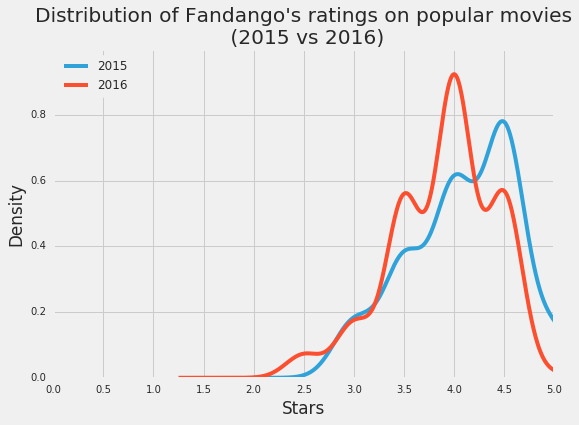

In [10]:
# Compare the shapes of the distributions of movie ratings for both samples.
plt.style.use('fivethirtyeight')
fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label='2016', legend=True)
plt.title('Distribution of Fandango\'s ratings on popular movies\n (2015 vs 2016)')
plt.xlabel('Stars')
plt.legend(loc=2, fontsize=12, frameon=True)
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8])
plt.show()

<b>What is the shape of each distribution? </b>
- 2015: slightly left (negatively) skewed
- 2016: left (negatively) skewed

<b>How do their shapes compare?  </b>  
The graphs look similar in shape, but do have some differences. Both graphs start low, then go up untill around 4/4.5 stars and then declines at 5 stars

<b>If their shapes are similar, is there anything that clearly differentiates them?</b>  

<u>Graph of 2015 released movies</u>
- It's peak is at 4.5*
- Is more to the right (higher ratings)

<u>Graph of 2016 released movies</u>
- It's peak is at 4.0*
- Is more to the left (lower ratings)

<b>Can we see any evidence on the graph that suggests that there is indeed a change between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016?</b>  
Comparing both graphs we can see the distribution of ratings has shifted down from 2015 to 2016. Moreover, we see that the most common rating has shifted from 4.5 stars in 2015 to 4.0 stars in 2016. This difference can be explained by several reasons. One reason could be that indeed Fandango's rating system has been adjusted and no longer rounds up the ratings. Another reason could be that movies in 2016 we simply reviewed lower than in 2015.

<b> Provided there's a difference, can we tell anything about the direction of the difference? In other words, were movies in 2016 rated lower or higher compared to 2015?</b>  
The distribution of ratings has shifted down from 2015 to 2016.

## Comparing Relative Frequencies

In [11]:
# Frequency distribution table of 2015 movies
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [12]:
# Frequency distribution table of 2016 movies
fandango_2016['fandango'].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Comparing both table we see that 2015 movies have a higher percentage of ratings at 5.0 and 4.5 stars, and a lower percentage of movies at 4.0 and 3.5 stars. However it takes more effort to compare the values for each star between the two tables than by looking at the graph. 

## Determining the Direction of the Change

In [118]:
statistics = pd.DataFrame(index=['Mean', 'Median','Mode'])
statistics['2015'] = [fandango_2015['Fandango_Stars'].mean(),
                      fandango_2015['Fandango_Stars'].median(),
                      fandango_2015['Fandango_Stars'].mode()[0]
                     ]
statistics['2016'] = [fandango_2016['fandango'].mean(),
                     fandango_2016['fandango'].median(),
                      fandango_2016['fandango'].mode()[0]
                     ]           
statistics

,2015,2016
Mean,4.085271,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


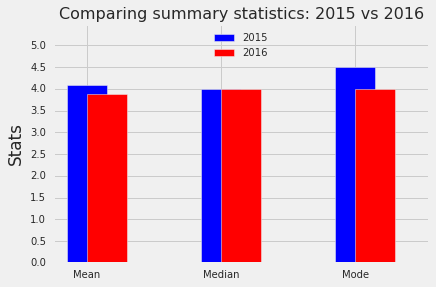

In [131]:
plt.style.use('fivethirtyeight')
statistics['2015'].plot.bar(align='center', color = '#0000FF', width = .3)
statistics['2016'].plot.bar(align='edge', color = '#FF0000', width = .3)
plt.legend(loc='upper center')
plt.xticks(rotation = 0)
plt.ylim(0.0,5.5)
plt.yticks(np.arange(0,5.1,0.5))
plt.ylabel('Stats')
plt.title('Comparing summary statistics: 2015 vs 2016', size=16)
plt.show()

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

## Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.